# Figure 4

In [1]:
using LaTeXStrings, LinearAlgebra, ProgressMeter, Random, Statistics, StatsPlots
pyplot()
versioninfo()

Julia Version 1.4.1
Commit 381693d3df* (2020-04-14 17:20 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Xeon(R) CPU E5-2667 v2 @ 3.30GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-8.0.1 (ORCJIT, ivybridge)


## Generate data

In [2]:
Random.seed!(1)

n, p = 50*4, 80*4
θ = 3

u = [ones(n÷2); -ones(n÷2)]/sqrt(n)
v = [ones(p÷2); -ones(p÷2)]/sqrt(p)

S = θ*u*v'
N = [[sqrt(1/14)*randn(n÷10*7,p÷4*3); sqrt(19/6)*randn(n÷10*3,p÷4*3)] randn(n,p÷4*1)]/sqrt(n)

X = S + N
#;

## Visualize data

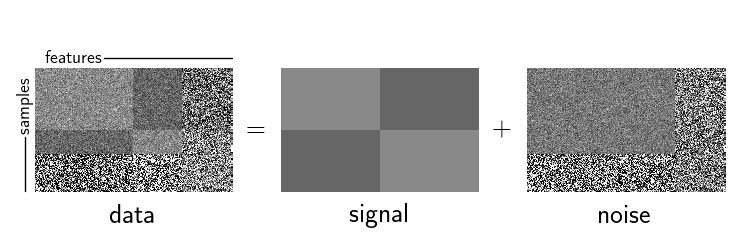

In [3]:
hgap, vgap, lgap = 80, 40, 16
msize, nsize, lsize = 20, 20, 13
flength, slength = 96, 96
figsize, figdpi = (750, 250), 100
crange = 0.35/4

plot(bordercolor=:white,axis=nothing,dpi=figdpi,size=figsize)
for (pshift, P) in zip((0:2).*(p+hgap),[X,S,N])
    heatmap!(pshift.+(1:p),1:n,P,yflip=true,aspect_ratio=1,color=:greys,colorbar=nothing,clim=(-crange,crange))
end
annotate!([(p+hgap/2,n/2,Plots.text(L"=",msize,:center)),(p+hgap+p+hgap/2,n/2,Plots.text(L"+",msize,:center))])
annotate!([(p/2,n+vgap,Plots.text("data",nsize,:center)),(p+hgap+p/2,n+vgap,Plots.text("signal",nsize,:center)),(p+hgap+p+hgap+p/2,n+vgap,Plots.text("noise",nsize,:center))])
annotate!([(lgap,-lgap,Plots.text("features",lsize,:left)),(-lgap,lgap,Plots.text("samples",lsize,:top,rotation=90))])
plot!([lgap + flength,p],[-lgap,-lgap],color=:black,label="")
plot!([-lgap,-lgap],[lgap + slength,n],color=:black,label="")

## Visualize signflips

In [4]:
Random.seed!(0)

flip = rand([-1,1],size(X))
Xf, Sf, Nf = flip.*X, flip.*S, flip.*N
#;

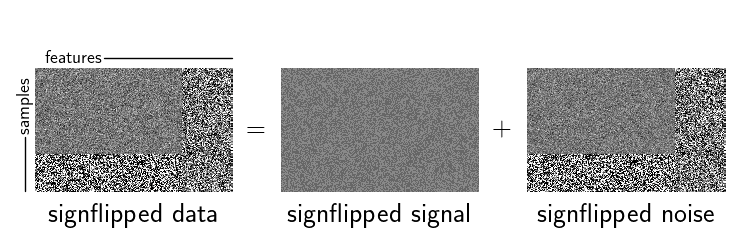

In [5]:
hgap, vgap, lgap = 80, 40, 16
msize, nsize, lsize = 20, 20, 13
flength, slength = 96, 96
figsize, figdpi = (750, 250), 100
crange = 0.35/4

plot(bordercolor=:white,axis=nothing,dpi=figdpi,size=figsize)
for (pshift, P) in zip((0:2).*(p+hgap),[Xf,Sf,Nf])
    heatmap!(pshift.+(1:p),1:n,P,yflip=true,aspect_ratio=1,color=:greys,colorbar=nothing,clim=(-crange,crange))
end
annotate!([(p+hgap/2,n/2,Plots.text(L"=",msize,:center)),(p+hgap+p+hgap/2,n/2,Plots.text(L"+",msize,:center))])
annotate!([(p/2,n+vgap,Plots.text("signflipped data",nsize,:center)),(p+hgap+p/2,n+vgap,Plots.text("signflipped signal",nsize,:center)),(p+hgap+p+hgap+p/2,n+vgap,Plots.text("signflipped noise",nsize,:center))])
annotate!([(lgap,-lgap,Plots.text("features",lsize,:left)),(-lgap,lgap,Plots.text("samples",lsize,:top,rotation=90))])
plot!([lgap + flength,p],[-lgap,-lgap],color=:black,label="")
plot!([-lgap,-lgap],[lgap + slength,n],color=:black,label="")

## Effect of Signflip PA on each part

In [6]:
Random.seed!(0)

σfX = @showprogress [svdvals(rand([-1,1],size(X)) .* X) for _ in 1:10000]
σfX = [getindex.(σfX,j) for j in 1:min(n,p)]
#;

Progress: 100%|█████████████████████████████████████████| Time: 0:01:25


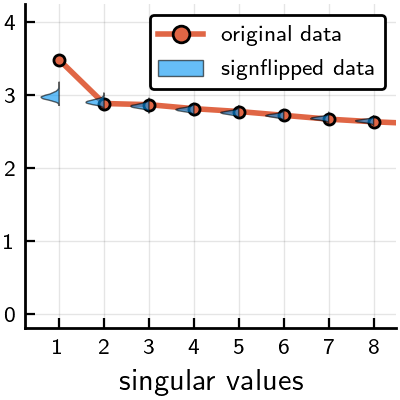

In [7]:
plot(xlims=(0.25,8.5),xticks=1:15,ylims=(-0.2,3.85),yticks=0:5,dpi=200,size=(200,425),legend=:topright)
xlabel!("singular values")
plot!(svdvals(X),label="original data",linewidth=2,marker=:circle,color=RGB(0.88,0.4,0.27))
violin!([1],σfX[1],side=:left,label="signflipped data",color=RGB(0,0.58,0.95),opacity=0.6,linewidth=0.5)
violin!(permutedims(2:min(n,p)),σfX[2:end],side=:left,label="",color=RGB(0,0.58,0.95),opacity=0.6,linewidth=0.5)
plot!(size=(200,200))
plot!(ylims=(-0.2,4.25))

In [8]:
Random.seed!(0)

σfS = @showprogress [svdvals(rand([-1,1],size(S)) .* S) for _ in 1:10000]
σfS = [getindex.(σfS,j) for j in 1:min(n,p)]
#;

Progress: 100%|█████████████████████████████████████████| Time: 0:01:27


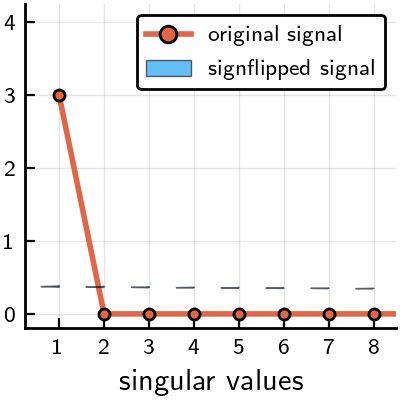

In [9]:
plot(xlims=(0.25,8.5),xticks=1:15,ylims=(-0.2,3.85),yticks=0:5,dpi=200,size=(200,425),legend=:topright)
xlabel!("singular values")
plot!(svdvals(S),label="original signal",linewidth=2,marker=:circle,color=RGB(0.88,0.4,0.27))
violin!([1],σfS[1],side=:left,label="signflipped signal",color=RGB(0,0.58,0.95),opacity=0.6,linewidth=0.5)
violin!(permutedims(2:min(n,p)),σfS[2:end],side=:left,label="",color=RGB(0,0.58,0.95),opacity=0.6,linewidth=0.5)
plot!(size=(200,200))
plot!(ylims=(-0.2,4.25))

In [10]:
Random.seed!(0)

σfN = @showprogress [svdvals(rand([-1,1],size(N)) .* N) for _ in 1:10000]
σfN = [getindex.(σfN,j) for j in 1:min(n,p)]

σN = @showprogress map(1:10000) do _
    N = [[sqrt(1/14)*randn(n÷10*7,p÷4*3); sqrt(19/6)*randn(n÷10*3,p÷4*3)] randn(n,p÷4*1)]/sqrt(n)
    svdvals(N)
end
σN = [getindex.(σN,j) for j in 1:min(n,p)]
#;

Progress: 100%|█████████████████████████████████████████| Time: 0:01:26
Progress: 100%|█████████████████████████████████████████| Time: 0:01:28


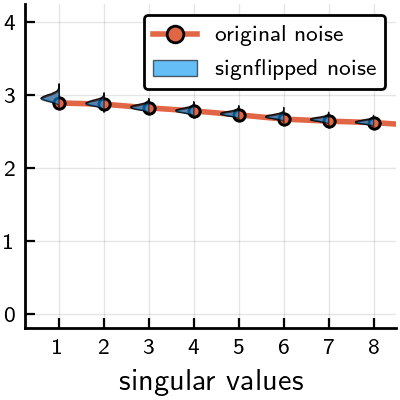

In [11]:
plot(xlims=(0.25,8.5),xticks=1:15,ylims=(-0.2,3.85),yticks=0:5,dpi=200,size=(200,425),legend=:topright)
xlabel!("singular values")
plot!(svdvals(N),label="original noise",linewidth=2,marker=:circle,color=RGB(0.88,0.4,0.27))
violin!(permutedims(1:min(n,p)),σN,side=:left,label="",color=RGB(0.88,0.4,0.27),opacity=0.9,linewidth=0.5)
scatter!(svdvals(N),label="",marker=:circle,color=RGB(0.88,0.4,0.27))
violin!([1],σfN[1],side=:left,label="signflipped noise",color=RGB(0,0.58,0.95),opacity=0.6,linewidth=0.5)
violin!(permutedims(2:min(n,p)),σfN[2:end],side=:left,label="",color=RGB(0,0.58,0.95),opacity=0.6,linewidth=0.5)
plot!(size=(200,200))
plot!(ylims=(-0.2,4.25))